---

<center><h1> 📍 📍 Assignment 6 📍 📍</h1></center>

---

# **Project: Segmenting customers into clusters**

### Task 
Perform Customer Segmentation on the transactional data to build an efficient marketing
model. This is a transactional data set that contains all the transactions occurring between
01/12/2010 and 09/12/2011 for a registered non-store online retail.


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read-in the excel spreadsheet using pandas 
df = pd.read_excel('Cs_dataset.xlsx')

In [3]:
# Displaying Number of Rows and Columns
print("No of Rows :",df.shape[0])
print("No of Columns :",df.shape[1])

No of Rows : 541909
No of Columns : 8


- we have 8 columns of data for each row and each row represents an item purchased.

In [4]:
# take a look at the first 5 rows in the DataFrame
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# take a look at the last 5 rows in the DataFrame
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Let's see the description of each column:
- **Invoice No**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each
transaction. If this code starts with the letter 'c', it indicates a cancellation.
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each
distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **Invoice Date**: Invoice Date and time. Numeric, the day and time when each transaction was
generated.
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each
customer.
- **Country**: Country name. Nominal, the name of the country where each customer resides.

### Data Cleanup (EDA and Feature Engineering)
Below, We are going to remove data that isn’t helpful, is missing, or may cause issues later.

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We can see in the output that Quantity and UnitPrice are having negative values, which may mean that we may have some return transactions in our data also. As our goal is customer segmentation, it is important that these records are removed

In [8]:
# Check the missing value in our dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- We can see that we have missing values in `CustomerID`' and `Description` column. We are going to drop it.

In [9]:
# Drop records without CustomerID and Description
new_df = df.dropna(subset = ['Description','CustomerID'])

In [10]:
# Check and Drop duplicate records
print('No of duplicate recoreds are :', df.duplicated().sum())

No of duplicate recoreds are : 5268


In [11]:
# Drop all duplicate records from new_df
new_df.drop_duplicates(keep = 'first', inplace = True)

In [12]:
print('No of duplicate records in new_df : ' , new_df.duplicated().sum())

No of duplicate records in new_df :  0


In [13]:
#check missing value again
new_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- Now we do not have any missing value.

In [14]:
# check unique value in datasets
new_df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [15]:
# checking the datatypes of all features
new_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Drop all cancelled order, because that data is not going to help us anyway

In [16]:
new_df = new_df.loc[df['Quantity'] > 0]

In [17]:
# Calculate total sales from the Quantity and UnitPrice
new_df['Sales'] = new_df['Quantity'] * new_df['UnitPrice']

In [18]:
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Now let’s transform the data so that each record represents a single customer’s purchase history.

In [19]:
# use groupby to aggregate sales by CustomerID
customer_df = new_df.groupby('CustomerID').agg({'Sales': sum, 
                                            'InvoiceNo': lambda x: x.nunique()})

# Select the columns we want to use
customer_df.columns = ['TotalSales', 'OrderCount'] 

# create a new column 'AvgOrderValu'
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']

customer_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [20]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(customer_df)

scaled_df = pd.DataFrame(data_scaled, columns = customer_df.columns)

In [21]:
scaled_df.head()

,TotalSales,OrderCount,AvgOrderValue
0,8.363977,-0.424675,42.740729
1,0.251779,0.354080,0.110344
2,-0.027938,-0.035297,0.017695
3,-0.032357,-0.424675,0.746079
4,-0.190780,-0.424675,-0.046283


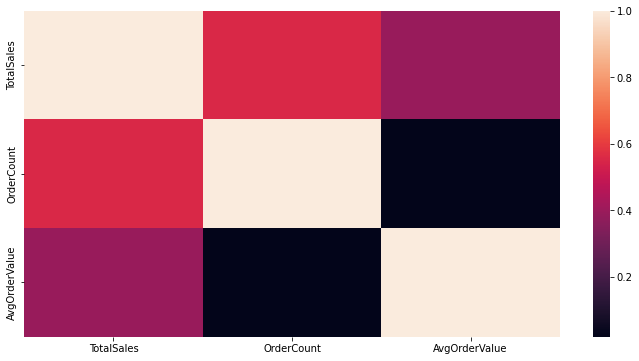

In [22]:
#Checking correlation among all features
import seaborn as sns
plt.figure(figsize =(12,6))
corr = scaled_df.corr()
ax = sns.heatmap(corr)

## K-means

In [23]:
SSE_scaled = []

In [24]:
for cluster in range(2,11):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

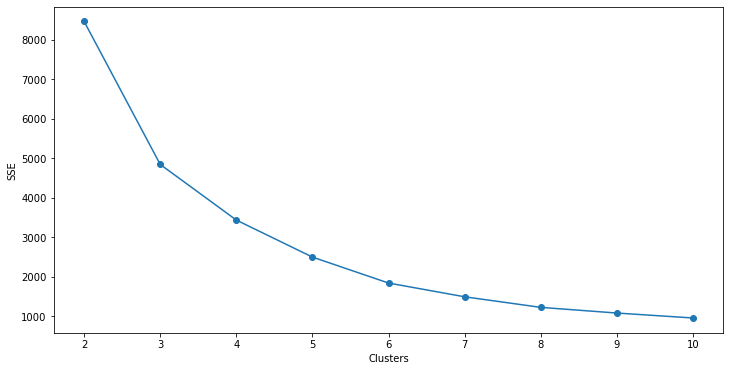

In [25]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(2,11), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

Based on the graph above, it looks like **K=4**, or 4 clusters is the optimal number of clusters. Now let’s interpret the customer segments provided by these clusters.

In [26]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [27]:
pred

array([1, 0, 0, ..., 0, 3, 0])

In [28]:
df_normalized = pd.DataFrame(data_scaled, columns = ['TotalSales','OrderCount','AvgOrderValue'])

In [29]:
df_normalized['cluster'] = pred

In [30]:
df_normalized['cluster'].value_counts()

0    4095
3     230
2      12
1       2
Name: cluster, dtype: int64

No of data points lie in each cluster

In [31]:
df_normalized.head()

,TotalSales,OrderCount,AvgOrderValue,cluster
0,8.363977,-0.424675,42.740729,1
1,0.251779,0.354080,0.110344,0
2,-0.027938,-0.035297,0.017695,0
3,-0.032357,-0.424675,0.746079,0
4,-0.190780,-0.424675,-0.046283,0


### Visualizing Clusters

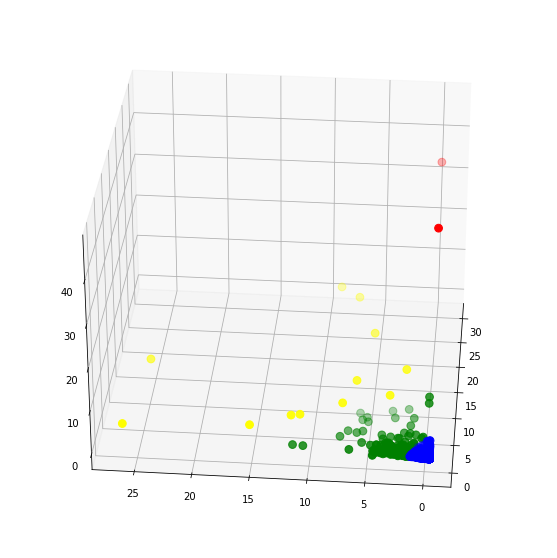

In [32]:
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_normalized["TotalSales"][df_normalized['cluster'] == 0], df_normalized["OrderCount"][df_normalized['cluster'] == 0], df_normalized["AvgOrderValue"][df_normalized['cluster'] == 0], c='blue', s=60)
ax.scatter(df_normalized["TotalSales"][df_normalized['cluster'] == 1],df_normalized["OrderCount"][df_normalized['cluster'] == 1], df_normalized["AvgOrderValue"][df_normalized['cluster'] == 1], c='red', s=60)
ax.scatter(df_normalized["TotalSales"][df_normalized['cluster'] == 2], df_normalized["OrderCount"][df_normalized['cluster'] == 2], df_normalized["AvgOrderValue"][df_normalized['cluster'] == 2], c='yellow', s=60)
ax.scatter(df_normalized["TotalSales"][df_normalized['cluster'] == 3], df_normalized["OrderCount"][df_normalized['cluster'] == 3], df_normalized["AvgOrderValue"][df_normalized['cluster'] == 3], c='green', s=60)

ax.view_init(30, 185)
plt.show()

#### Let’s look at the analytics of dataframe.

In [33]:
df_normalized['cluster'] = kmeans.labels_
analysis = df_normalized.groupby('cluster').agg({
    'AvgOrderValue':['mean','max','min'],
    'OrderCount':['mean','max','min'],
    'TotalSales':['mean','max','min','count']})

In [34]:
analysis

AvgOrderValue                       OrderCount                       \
                 mean        max        min       mean        max       min   
cluster                                                                       
0           -0.033057   3.223754  -0.232465  -0.156564   1.262628 -0.424675   
1           44.704066  46.667404  42.740729  -0.359779  -0.294882 -0.424675   
2            1.025434   3.079351  -0.144832  11.051146  26.701960  2.171175   
3            0.146334   8.032594  -0.213957   2.214063  11.516236 -0.165090   

        TotalSales                             
              mean        max       min count  
cluster                                        
0        -0.105787   1.260980 -0.228005  4095  
1        13.445060  18.526142  8.363977     2  
2        13.547421  30.964178  3.451435    12  
3         1.059739   7.191786 -0.083687   230

### Conclusions

- There are 4 segments of customers
- Cluster 2 has maximum sales